In [67]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import scipy
from tqdm import tqdm
import pandas as pd

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

math.sin(5)

-0.9589242746631385

0) Найдем число пи

1) Проверим центральную предельную теорему

2) Тестирование гипотез

3) Линал и матрицы

# 0

In [28]:
N = 100000
points = np.random.uniform(-1, 1, size=(N, 2))

In [29]:
4*(np.sum(points[:,0]**2 + points[:,1]**2 < 1)/N)

3.14157108

In [34]:
x = np.linspace(1, 7)
logx = np.logspace(1, 7).astype(int)

In [39]:
errors = []
for N in tqdm(logx, position=0, leave=True):
    points = np.random.uniform(-1, 1, size=(N, 2))
    pi_est = 4*(np.sum(points[:,0]**2 + points[:,1]**2 < 1)/N)
    errors.append(abs(pi_est - np.pi)/np.pi)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.46it/s]


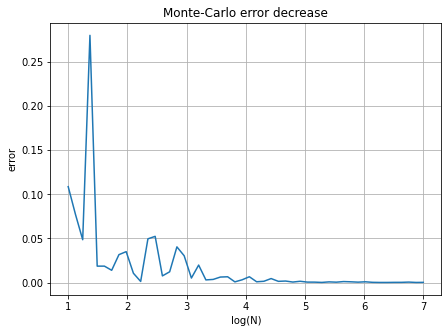

In [45]:
plt.figure(figsize=(7, 5))
plt.title("Monte-Carlo error decrease")
plt.plot(x, errors)
plt.xlabel('log(N)')
plt.ylabel('error')
plt.grid(True)

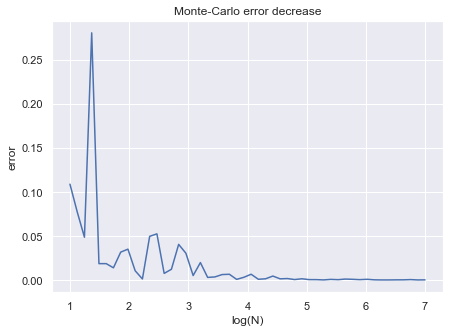

In [66]:
plt.figure(figsize=(7, 5))
plt.title("Monte-Carlo error decrease")
sns.lineplot(x, errors)
plt.xlabel('log(N)')
plt.ylabel('error')
plt.show()

# 1

In [59]:
N = 1000000
uniform_data = np.random.exponential(scale=3, size=N)

<AxesSubplot:ylabel='Density'>

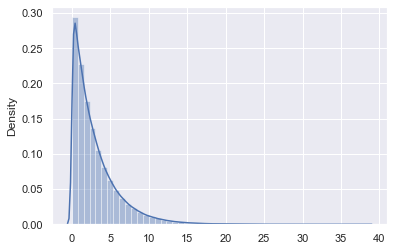

In [60]:
sns.distplot(uniform_data)

In [61]:
samples = uniform_data.reshape((N//400, 400))

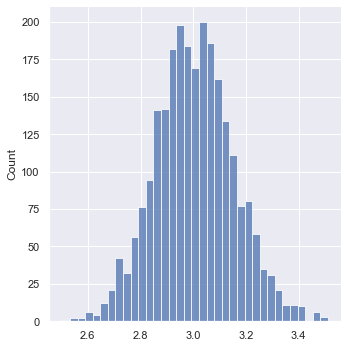

In [65]:
sns.displot(samples.mean(axis=1), kind="hist")

# 2

In [89]:
N = 200
df = pd.DataFrame()
df['dist1'] = np.random.normal(size=N)
df['dist2'] = np.random.normal(loc=0.1, size=N)

Демонстрация seaborn

In [90]:
df.head()

,dist1,dist2
0,0.682108,0.955123
1,0.357910,1.192970
2,0.042914,-0.159010
3,-0.452553,0.836868
4,0.584948,-0.274827


<AxesSubplot:xlabel='dist1', ylabel='dist2'>

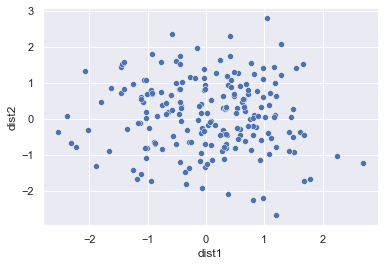

In [91]:
sns.scatterplot(x='dist1', y='dist2', data=df)

In [92]:
scipy.stats.ttest_ind(df['dist1'], df['dist2'])

Ttest_indResult(statistic=-0.786119634276879, pvalue=0.43226518044942464)

In [93]:
df['target'] = 0.1*df['dist1'] + 2*df['dist1'] + np.random.normal(scale=0.3, size=N)

In [94]:
df.head()

,dist1,dist2,target
0,0.682108,0.955123,1.568449
1,0.357910,1.192970,1.017379
2,0.042914,-0.159010,0.010543
3,-0.452553,0.836868,-1.156219
4,0.584948,-0.274827,1.700671


In [95]:
import statsmodels.api as sm

model = sm.OLS(df['target'], df[['dist1', 'dist2']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              5432.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                   1.07e-173
Time:                        22:10:59   Log-Likelihood:                         -25.388
No. Observations:                 200   AIC:                                      54.78
Df Residuals:                     198   BIC:                                      61.37
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.982    
Dependent Variable:     target           AIC:                         54.7759  
Date:                   2021-11-29 22:11 BIC:                         61.3725  
No. Observations:       200              Log-Likelihood:              -25.388  
Df Model:               2                F-statistic:                 5432.    
Df Residuals:           198              Prob (F-statistic):          1.07e-173
R-squared (uncentered): 0.982            Scale:                       0.076234 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t          P>|t|        [0.025      0.975]
------------------------------------------------------------------------------------
dist1        2.1280        0.0204      104.1410      0.0000       2.0877      2.1683
dist2        0.0320        0.0197        1.6260      0.1055      -0.0068      0.0709
-------------------------------------------------------------------------------
Omnibus:                   1.559             Durbin-Watson:               2.134
Prob(Omnibus):             0.459             Jarque-Bera (JB):            1.435
Skew:                      -0.207            Prob(JB):                    0.488
Kurtosis:                  2.996             Condition No.:               1    
===============================================================================

"""

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

models = [LinearRegression(), Lasso(), Ridge()]
for model in models:
    """
        модель обучись
        модель предскажи
        измерь качество
    """
    pass

## Линал
решаем систему уравнений

In [100]:
A = np.array([
    [0.1, 2, 7],
    [3, -1, 3.5],
    [4, -9, 7.1]
])
b = np.array([5, 8, 0])

In [102]:
x = np.linalg.inv(A) @ b

In [104]:
np.exp(A)

array([[1.10517092e+00, 7.38905610e+00, 1.09663316e+03],
       [2.00855369e+01, 3.67879441e-01, 3.31154520e+01],
       [5.45981500e+01, 1.23409804e-04, 1.21196707e+03]])